In [190]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/car-price-prediction/CarPrice_Assignment.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# ****importing Libraries****

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

In [192]:
cars_data=pd.read_csv('../input/car-price-prediction/CarPrice_Assignment.csv')
cars_data.head()
cars_data = cars_data.sample(frac=1)


# Checking for relationships between Features


In [193]:
cars_data.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


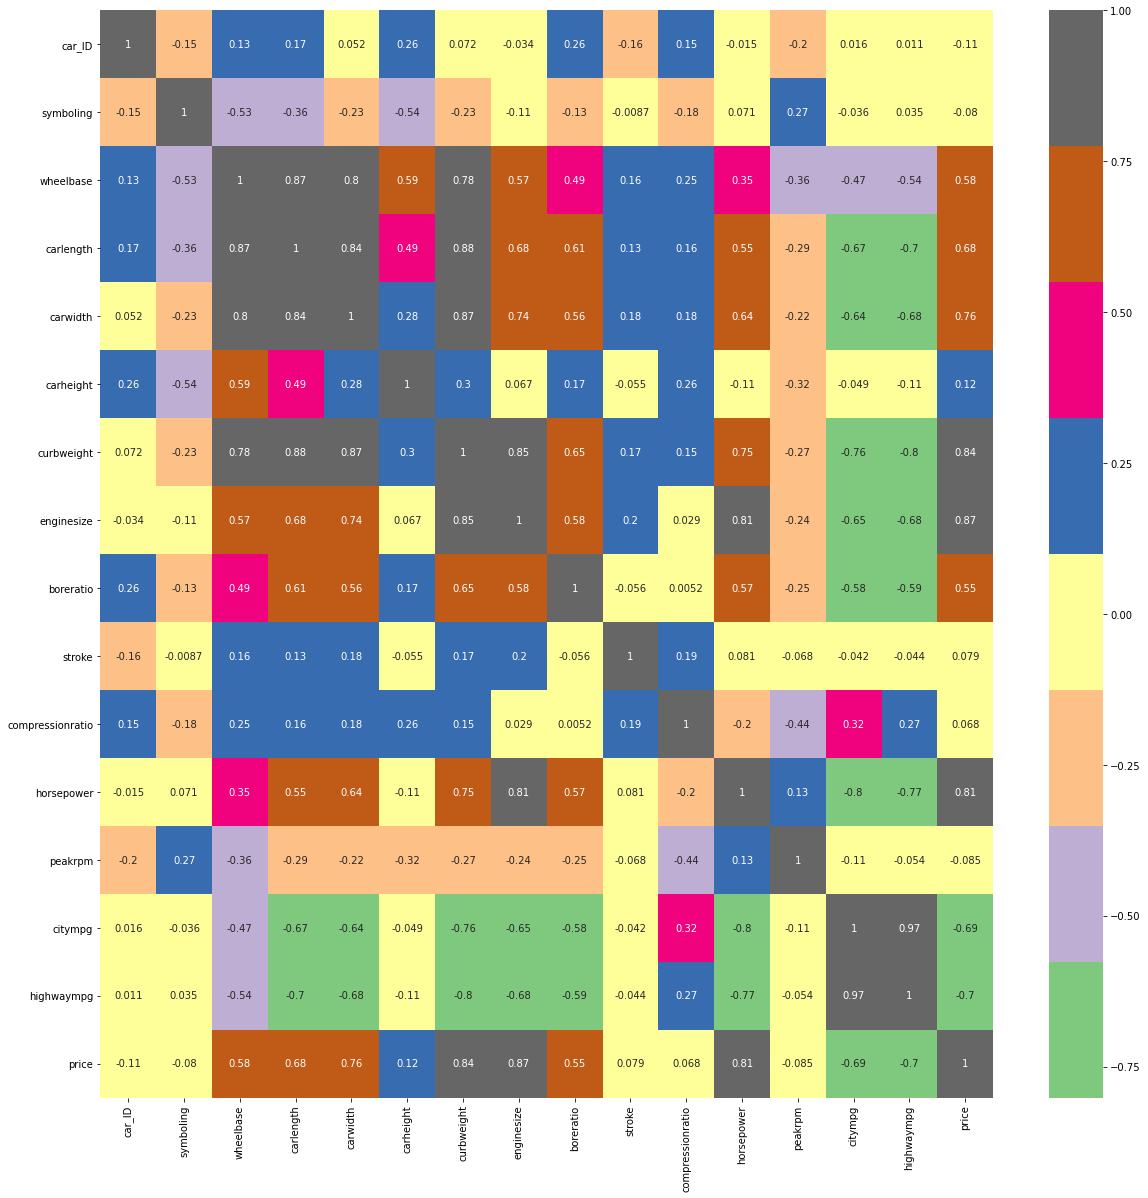

In [194]:
plt.figure(figsize=(20,20))
import seaborn as sns
g=sns.heatmap(cars_data.corr(),annot=True,cmap="Accent")

In [195]:
cars_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [196]:

cars_data.drop(columns='car_ID',inplace=True)
cars_data.drop(columns='CarName',inplace=True)
# dataset.drop(columns='car_ID', inplace=True)
# dataset.drop(columns='CarName', inplace=True)
cars_data.head(10)



,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
28,-1,gas,std,four,wagon,fwd,front,103.3,174.6,64.6,...,122,2bbl,3.34,3.460,8.5,88,5000,24,30,8921.0
83,3,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,...,156,spdi,3.59,3.860,7.0,145,5000,19,24,14869.0
60,0,gas,std,four,sedan,fwd,front,98.8,177.8,66.5,...,122,2bbl,3.39,3.390,8.6,84,4800,26,32,8495.0
159,0,diesel,std,four,hatchback,fwd,front,95.7,166.3,64.4,...,110,idi,3.27,3.350,22.5,56,4500,38,47,7788.0
102,0,gas,std,four,wagon,fwd,front,100.4,184.6,66.5,...,181,mpfi,3.43,3.270,9.0,152,5200,17,22,14399.0
125,3,gas,std,two,hatchback,rwd,front,94.5,168.9,68.3,...,151,mpfi,3.94,3.110,9.5,143,5500,19,27,22018.0
198,-2,gas,turbo,four,sedan,rwd,front,104.3,188.8,67.2,...,130,mpfi,3.62,3.150,7.5,162,5100,17,22,18420.0
56,3,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,3.33,3.255,9.4,101,6000,17,23,11845.0
166,1,gas,std,two,hatchback,rwd,front,94.5,168.7,64.0,...,98,mpfi,3.24,3.080,9.4,112,6600,26,29,9538.0
182,2,diesel,std,two,sedan,fwd,front,97.3,171.7,65.5,...,97,idi,3.01,3.400,23.0,52,4800,37,46,7775.0


In [197]:
cars_data = pd.get_dummies(cars_data, prefix=['fueltype','aspiration', 'doornumber','carbody', 'drivewheel',
                                          'enginelocation', 'enginetype','cylindernumber', 
                                          'fuelsystem'])


In [198]:
cars_data


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
28,-1,103.3,174.6,64.6,59.8,2535,122,3.34,3.46,8.5,...,0,0,0,1,0,0,0,0,0,0
83,3,95.9,173.2,66.3,50.2,2921,156,3.59,3.86,7.0,...,0,0,0,0,0,0,0,0,1,0
60,0,98.8,177.8,66.5,55.5,2410,122,3.39,3.39,8.6,...,0,0,0,1,0,0,0,0,0,0
159,0,95.7,166.3,64.4,52.8,2275,110,3.27,3.35,22.5,...,0,0,0,0,0,1,0,0,0,0
102,0,100.4,184.6,66.5,56.1,3296,181,3.43,3.27,9.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
62,0,98.8,177.8,66.5,55.5,2410,122,3.39,3.39,8.6,...,0,0,0,1,0,0,0,0,0,0
149,0,96.9,173.6,65.4,54.9,2650,108,3.62,2.64,7.7,...,0,0,0,0,0,0,0,1,0,0


In [199]:
cars_data.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_m

In [200]:
y=cars_data['price']

In [201]:
cars_data.drop(columns='price',inplace=True)

In [202]:
cars_data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
28,-1,103.3,174.6,64.6,59.8,2535,122,3.34,3.46,8.5,...,0,0,0,1,0,0,0,0,0,0
83,3,95.9,173.2,66.3,50.2,2921,156,3.59,3.86,7.0,...,0,0,0,0,0,0,0,0,1,0
60,0,98.8,177.8,66.5,55.5,2410,122,3.39,3.39,8.6,...,0,0,0,1,0,0,0,0,0,0
159,0,95.7,166.3,64.4,52.8,2275,110,3.27,3.35,22.5,...,0,0,0,0,0,1,0,0,0,0
102,0,100.4,184.6,66.5,56.1,3296,181,3.43,3.27,9.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
62,0,98.8,177.8,66.5,55.5,2410,122,3.39,3.39,8.6,...,0,0,0,1,0,0,0,0,0,0
149,0,96.9,173.6,65.4,54.9,2650,108,3.62,2.64,7.7,...,0,0,0,0,0,0,0,1,0,0


In [203]:
cars_data.shape

(205, 52)

In [204]:
X_train = cars_data[:104]
Y_train = y[:104]
X_test = cars_data[104:165]
Y_test=y[104:165]
X_val = cars_data[165:]
Y_val = y[165:]


In [205]:
X_train

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
28,-1,103.3,174.6,64.6,59.8,2535,122,3.34,3.46,8.5,...,0,0,0,1,0,0,0,0,0,0
83,3,95.9,173.2,66.3,50.2,2921,156,3.59,3.86,7.0,...,0,0,0,0,0,0,0,0,1,0
60,0,98.8,177.8,66.5,55.5,2410,122,3.39,3.39,8.6,...,0,0,0,1,0,0,0,0,0,0
159,0,95.7,166.3,64.4,52.8,2275,110,3.27,3.35,22.5,...,0,0,0,0,0,1,0,0,0,0
102,0,100.4,184.6,66.5,56.1,3296,181,3.43,3.27,9.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,1,93.7,167.3,63.8,50.8,2191,98,2.97,3.23,9.4,...,0,0,0,1,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
8,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,...,0,0,0,0,0,0,0,1,0,0
160,0,95.7,166.3,64.4,53.0,2094,98,3.19,3.03,9.0,...,0,0,0,1,0,0,0,0,0,0


In [206]:
mean=X_train.iloc[:,:14].mean(axis=0)
X_train.iloc[:,:14]=X_train.iloc[:,:14]-mean
std=X_train.iloc[:,:14].std(axis=0)
X_train.iloc[: , 0:14] = X_train.iloc[: , 0:14]/std
X_train

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
28,-1.415481,0.876291,0.056183,-0.628493,2.332612,-0.077939,-0.123574,0.018600,0.747856,-0.350122,...,0,0,0,1,0,0,0,0,0,0
83,1.543515,-0.427641,-0.063762,0.238259,-1.332606,0.759749,0.762752,0.914134,2.115664,-0.778810,...,0,0,0,0,0,0,0,0,1,0
60,-0.675732,0.083359,0.330341,0.340229,0.690900,-0.349211,-0.123574,0.197706,0.508489,-0.321543,...,0,0,0,1,0,0,0,0,0,0
159,-0.675732,-0.462882,-0.654916,-0.730463,-0.339943,-0.642184,-0.436396,-0.232150,0.371708,3.650961,...,0,0,0,0,0,1,0,0,0,0
102,-0.675732,0.365291,0.912928,0.340229,0.919976,1.573565,1.414463,0.340992,0.098147,-0.207226,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.064017,-0.815297,-0.569241,-1.036376,-1.103530,-0.824479,-0.749217,-1.306791,-0.038634,-0.092910,...,0,0,0,1,0,0,0,0,0,0
4,0.803766,0.189084,0.227532,0.289244,0.232747,0.549242,0.241384,-0.518721,0.542684,-0.493018,...,0,0,0,0,0,0,0,1,0,0
8,0.064017,1.316809,1.606892,2.838512,0.843617,1.117828,0.111041,-0.733649,0.542684,-0.407281,...,0,0,0,0,0,0,0,1,0,0
160,-0.675732,-0.462882,-0.654916,-0.730463,-0.263584,-1.034986,-0.749217,-0.518721,-0.722538,-0.207226,...,0,0,0,1,0,0,0,0,0,0


In [207]:
val_mean = X_val.iloc[:, 0:14].mean(axis=0)
val_std = X_val.iloc[:, 0:14].std(axis=0)
X_val.iloc[:, 0:14] -= val_mean
X_val.iloc[:, 0:14] /= val_std

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [208]:
test_mean = X_test.iloc[:, 0:14].mean(axis=0)
test_std =  X_test.iloc[:, 0:14].std(axis=0)
X_test.iloc[:, 0:14] -= test_mean
X_test.iloc[:, 0:14] /= test_std
X_test

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
116,-0.631811,1.329248,0.938708,0.988156,1.335550,1.123011,0.401878,1.369596,0.724495,2.377811,...,0,0,0,0,0,1,0,0,0,0
200,-1.528101,1.515792,1.092755,1.185141,0.793931,0.647137,0.191206,1.665987,-0.453593,-0.267343,...,0,0,0,0,0,0,0,1,0,0
154,-0.631811,-0.567275,-0.308333,-0.902903,2.418788,-0.402959,-0.747243,-1.038585,-0.835675,-0.382350,...,0,0,0,1,0,0,0,0,0,0
100,-0.631811,-0.334096,-0.036918,-0.272550,0.432851,-0.383924,-0.210986,-0.001215,0.565294,-0.497357,...,0,0,0,1,0,0,0,0,0,0
37,-0.631811,-0.442913,-0.469715,-0.272550,-0.199038,-0.488616,-0.402506,-0.668095,0.915537,-0.382350,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,1.160769,-0.147553,0.168477,-0.114962,-0.785792,0.214091,0.286966,1.073204,0.660815,-0.313346,...,0,0,0,0,0,0,0,1,0,0
18,1.160769,-1.702080,-2.406297,-2.203006,-0.244173,-1.675129,-1.340955,-1.557270,-0.835675,-0.267343,...,0,0,0,1,0,0,0,0,0,0
75,0.264479,0.520894,0.329859,0.830568,0.477986,0.580514,0.172054,1.665987,-0.549113,-0.612364,...,0,0,0,0,0,0,0,1,0,0
167,1.160769,-0.147553,0.168477,-0.114962,-0.785792,-0.006397,0.286966,1.073204,0.660815,-0.313346,...,0,0,0,0,0,0,0,1,0,0


In [209]:
X_train.shape

(104, 52)

In [210]:
X_test.shape

(61, 52)

In [211]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers


In [212]:
# model=Sequential()
# model.add(layers.Dense(16,activation='relu',input_shape=(X_train.shape[1],)))
# model.add(layers.Dense(14,activation='relu'))
# model.add(layers.Dense(8,activation='relu'))
# model.add(layers.Dense(1))

In [213]:
# model.compile(optimizer='rmsprop', loss='mse', metrics='mae')

In [214]:
# history=model.fit(X_train,Y_train,epochs=300,validation_data=(X_val, Y_val))

In [215]:
# train_mae=history.history['mae']
# val_mae=history.history['val_mae']


In [216]:

# epochs=range(0,300)
# plt.plot(epochs,train_mae,'r')
# plt.plot(epochs,val_mae,'g')
# plt.xlabel('MAE')
# plt.ylabel('EPOCHES')


In [217]:
model.add(layers.Dense(16, activation='relu', kernel_regularizer =regularizers.l2(0.02),   input_shape=(X_train.shape[1],)))
model.add(layers.Dense(14, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
model.add(layers.Dense(8, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
model.add(layers.Dense(6, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
model.add(layers.Dense(1))

In [218]:
model.compile(optimizer='adam', loss='mse', metrics='mae')
history = model.fit(X_train,Y_train, batch_size=16, epochs=200, validation_data=(X_val, Y_val))

Epoch 1/200
7/7 [==============================] - 2s 69ms/step - loss: 233621346.0000 - mae: 13221.1001 - val_loss: 165597648.0000 - val_mae: 11702.4639
Epoch 2/200
7/7 [==============================] - 0s 11ms/step - loss: 244796338.0000 - mae: 13487.1892 - val_loss: 147562816.0000 - val_mae: 11040.1611
Epoch 3/200
7/7 [==============================] - 0s 12ms/step - loss: 178057416.0000 - mae: 11798.9786 - val_loss: 112839856.0000 - val_mae: 9636.2002
Epoch 4/200
7/7 [==============================] - 0s 11ms/step - loss: 131471726.0000 - mae: 10236.5861 - val_loss: 55637248.0000 - val_mae: 6693.1260
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 61286237.0000 - mae: 6545.9402 - val_loss: 5139669.5000 - val_mae: 1751.6003
Epoch 6/200
7/7 [==============================] - 0s 12ms/step - loss: 7579502.6250 - mae: 1965.3022 - val_loss: 31673420.0000 - val_mae: 4509.8779
Epoch 7/200
7/7 [==============================] - 0s 11ms/step - loss: 13585330.1250 - m

Text(0, 0.5, 'EPOCHES')

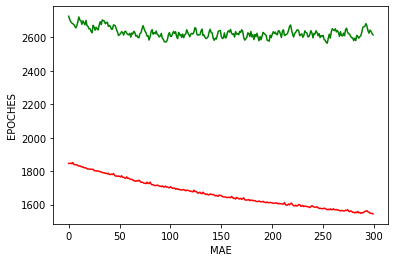

In [219]:
epochs=range(0,300)
plt.plot(epochs,train_mae,'r')
plt.plot(epochs,val_mae,'g')
plt.xlabel('MAE')
plt.ylabel('EPOCHES')


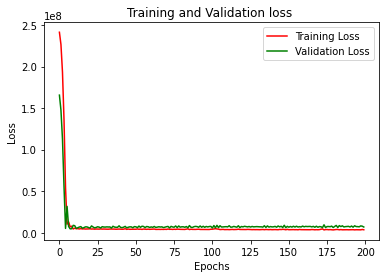

In [220]:
epochs=range(0,200)

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [228]:
a=model.predict(X_test)
print(a[0])
np.array(Y_test)[0]

[14283.52]


17950.0